In [33]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.io import ascii 
from scipy.optimize import curve_fit
import glob
from scipy.interpolate import interp1d as i1

In [34]:
jfo_0507 = ascii.read('SN2020jfo_20200507_redblu_130458.033.ascii', format = 'no_header')
jfo_0508 = ascii.read('SN2020jfo_20200508_redblu_130804.977.ascii', format = 'no_header')
jfo_0512 = ascii.read('SN2020jfo_20200512_redblu_083808.860.ascii', format = 'no_header') 
jfo_0516 = ascii.read('SN2020jfo_20200516_redblu_114620.495.ascii', format = 'no_header') 
jfo_0519 = ascii.read('SN2020jfo_20200519_redblu_120343.217.ascii', format = 'no_header') 
jfo_0523 = ascii.read('SN2020jfo_20200523_KAST.csv', format = 'csv', header_start = 18, data_start = 19)#KAST 
jfo_0524 = ascii.read('SN2020jfo_20200524_redblu_105947.534.ascii', format = 'no_header') 
jfo_0528 = ascii.read('SN2020jfo_20200528_redblu_113620.751.ascii', format = 'no_header') 
jfo_0605 = ascii.read('SN2020jfo_20200605_redblu_113353.824.ascii', format = 'no_header') 
jfo_0613 = ascii.read('SN2020jfo_20200613_redblu_071655.424.ascii', format = 'no_header') 
jfo_0626 = ascii.read('SN2020jfo_20200626_redblu_063302.731.ascii', format = 'no_header') 
jfo_0706 = ascii.read('SN2020jfo_20200706_redblu_101237.107.ascii' , format = 'no_header') 
jfo_0714 = ascii.read('SN2020jfo_20200714_redblu_061749.943.ascii', format = 'no_header') 
jfo_0723 = ascii.read('SN2020jfo_20200723_redblu_060251.843.ascii', format = 'no_header') 
jfo_0727 = ascii.read('SN2020jfo_20200727_KAST.csv', format = 'csv', header_start = 18, data_start = 19) #KAST 
jfo_0801 = ascii.read('SN2020jfo_20200801_redblu_082611.283.ascii', format = 'no_header') 
jfo_210212 = ascii.read('SN2020jfo_20210212_LRIS.csv', format = 'csv', header_start = 18, data_start = 19)  #LRIS
jfo_210510 = ascii.read('SN2020jfo_20210510_LRIS.csv', format = 'csv', header_start = 18, data_start = 19) #LRIS 


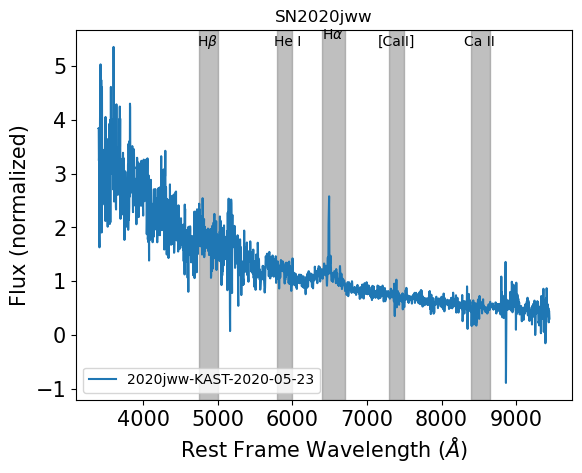

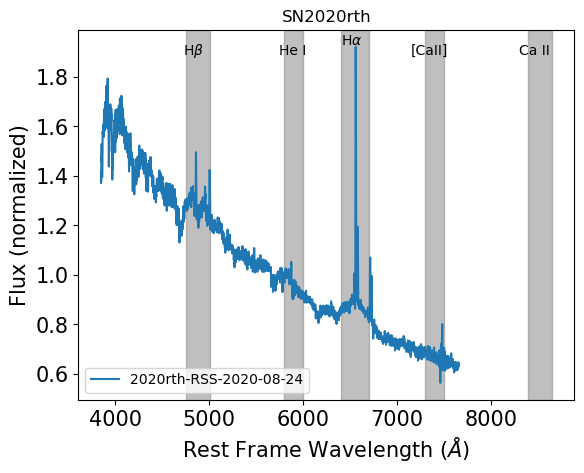

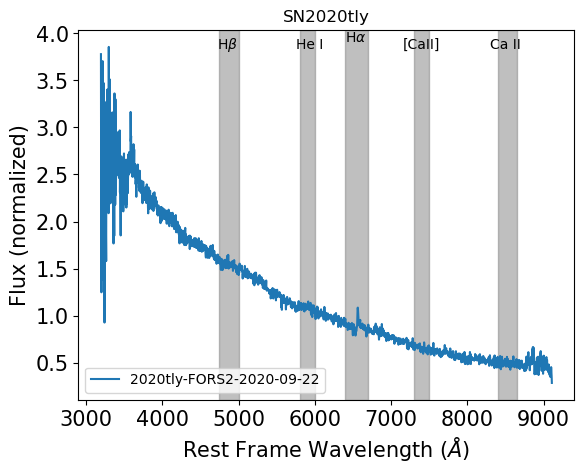

In [35]:
redshifts = [0.043, 0.005, 0.046, 0.0184, 0.058] 
spectra = glob.glob("*.csv")
for idx, file in enumerate(spectra):
    if 'jfo' in file:
        continue 
    if 'hgw' in file:
        continue
    object = ascii.read(file, format = 'csv', header_start = 18, data_start = 19)
    #print(object)
    wavelength = object['wavelength']
    flux = object['flux'] 
    if 'hgw' in file:
        z = redshifts[0]
    elif 'jfo' in file:
        z = redshifts[1] 
    elif 'ovk' in file:
        z = redshifts[2] 
    elif 'rth' in file:
        z = redshifts[3]
    
    else:
        z = redshifts[4]
    label = file.split('.')[0]
    plt.figure(idx)
    plt.title('SN' + file.split('-')[0])
    plt.plot(wavelength / ( 1 + z), flux / np.median(flux), label = label)
    
    ymin, ymax = plt.ylim()
    
    
    plt.axvspan(4750, 5010, color='grey', alpha = 0.5)
    plt.text(4720, ymax*0.95, r'H$\beta$', fontsize = 10)
    plt.axvspan(5800, 6000, color = 'grey', alpha= 0.5)
    plt.text(5750, ymax*0.95, r'He I', fontsize = 10)
    plt.xlabel('Wavelength $(\AA)$', fontsize = 15)
    plt.axvspan(6400, 6700, color = 'grey', alpha = 0.5)
    plt.text(6400, ymax*.97, r'H$\alpha$', fontsize = 10)
    plt.axvspan(7300, 7500, color = 'grey', alpha =0.5)
    plt.text(7150, ymax*0.95, '[CaII]', fontsize = 10)
    plt.axvspan(8400, 8650, color = 'grey', alpha=0.5)
    plt.text(8300, ymax*0.95, 'Ca II', fontsize = 10)
    plt.ylabel('Flux (Normalized + Offset)', fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.legend(loc='lower left')
    plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)
    plt.ylabel('Flux (normalized)', fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.legend(loc = 'lower left')

        


In [36]:
hgw_ALFOSC = ascii.read('2020hgw-ALFOSC-2020-04-29.csv', format = 'csv', header_start = 18, data_start = 19)
hgw_KAST = ascii.read('2020hgw-KAST-2020-05-23.csv', format = 'csv', header_start = 18, data_start = 19)
jww_KAST = ascii.read('2020jww-KAST-2020-05-23.csv', format = 'csv', header_start = 18, data_start = 19)
rth = ascii.read('2020rth-RSS-2020-08-24.csv', format = 'csv', header_start = 18, data_start = 19)
#tly = ascii.read('2020tly-FORS2-2020-09-22.csv', format = 'csv', header_start = 18, data_start = 19)

NOW WE START NA ID ANALYSIS AYOOOOOOOOOOO

FOR NOW IMA DO IT INVIVIDUALLY BUT I WILL ONE DAY MAKE IT A FUNCTION 

In [37]:
na_rest_wavelength = 5892

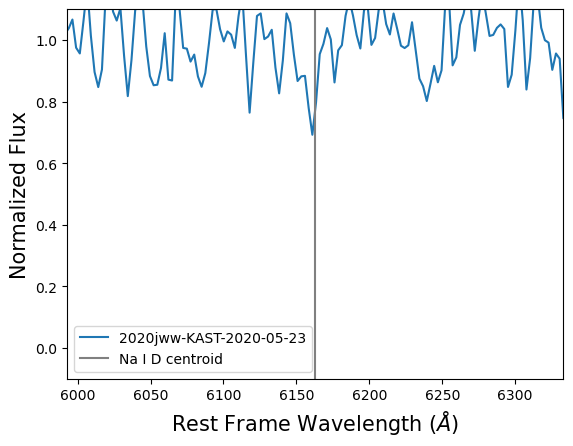

In [38]:
# gonna start with jww since i don't have to stack anything 
jww_centroid = na_rest_wavelength * (1 + redshifts[2])
jww_KAST_wavelength = jww_KAST['wavelength']
jww_KAST_flux = jww_KAST['flux'] 
lower_mask_jww = jww_centroid - 20
upper_mask_jww = jww_centroid + 20
mask_jww = (jww_KAST_wavelength > lower_mask_jww) & (jww_KAST_wavelength < upper_mask_jww)
continuum_jww = ((jww_KAST_wavelength > (lower_mask_jww - 150))&(jww_KAST_wavelength < (lower_mask_jww - 10))|(jww_KAST_wavelength > (upper_mask_jww + 10))&(jww_KAST_wavelength < (upper_mask_jww + 150)))
coeff_jww = np.polyfit(jww_KAST_wavelength[continuum_jww], jww_KAST_flux[continuum_jww], 2)
p_jww = np.poly1d(coeff_jww)
jww_flux_norm = jww_KAST_flux / p_jww(jww_KAST_wavelength)
plt.plot(jww_KAST_wavelength, jww_flux_norm, label = '2020jww-KAST-2020-05-23')
plt.xlim((lower_mask_jww - 150), (upper_mask_jww + 150))
plt.axvline(jww_centroid, color = 'grey', label = 'Na I D centroid')
plt.ylim(-0.1, 1.1)
plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)
plt.ylabel('Normalized Flux', fontsize = 15)
plt.legend()



the width of the absorption line is too small for there to be significant host reddening, so we can say it's 0

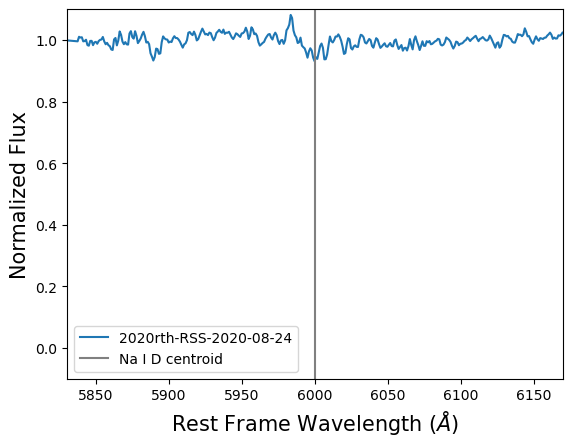

In [39]:
#rth time 
rth_centroid = na_rest_wavelength * (1 + redshifts[3])
rth_wavelength = rth['wavelength']
rth_flux = rth['flux']
lower_mask_rth = rth_centroid - 20 
upper_mask_rth = rth_centroid + 20 
mask_rth = (rth_wavelength > lower_mask_rth) & (rth_wavelength < upper_mask_rth)
continuum_rth = ((rth_wavelength > (lower_mask_rth - 150))&(rth_wavelength < (lower_mask_rth - 10))|(rth_wavelength > (upper_mask_rth + 10))&(rth_wavelength <(upper_mask_rth + 150)))
coeff_rth = np.polyfit(rth_wavelength[continuum_rth], rth_flux[continuum_rth],2)
p_rth = np.poly1d(coeff_rth)
rth_flux_norm = rth_flux / p_rth(rth_wavelength) 
plt.plot(rth_wavelength, rth_flux_norm, label = '2020rth-RSS-2020-08-24')
plt.xlim((lower_mask_rth - 150), (upper_mask_rth + 150))
plt.ylim(-0.1, 1.1)
plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)
plt.ylabel('Normalized Flux', fontsize = 15)
plt.axvline(rth_centroid, color = 'grey', label = 'Na I D centroid')
plt.legend()


In [40]:
rth_centroid

6000.4128

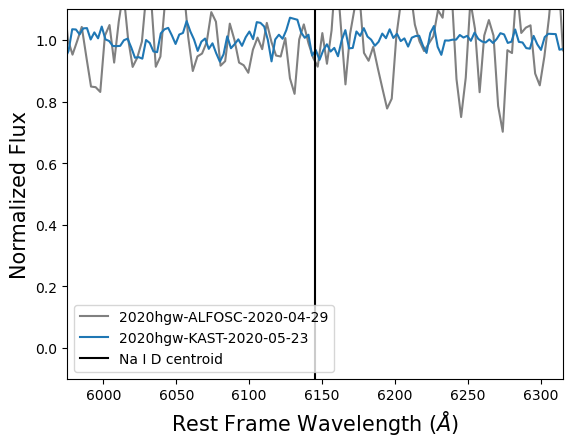

In [41]:
# hgw 
hgw_centroid = na_rest_wavelength * (1 + redshifts[0])
hgw_ALFOSC_wavelength = hgw_ALFOSC['wavelength']
hgw_ALFOSC_flux = hgw_ALFOSC['flux'] 
lower_mask_hgw_ALFOSC = hgw_centroid - 20
upper_mask_hgw_ALFOSC = hgw_centroid + 20
mask_hgw_ALFOSC = (hgw_ALFOSC_wavelength > lower_mask_hgw_ALFOSC) & (hgw_ALFOSC_wavelength < upper_mask_hgw_ALFOSC)
continuum_hgw_ALFOSC = ((hgw_ALFOSC_wavelength > (lower_mask_hgw_ALFOSC - 150))&(hgw_ALFOSC_wavelength < (lower_mask_hgw_ALFOSC - 10))|(hgw_ALFOSC_wavelength > (upper_mask_hgw_ALFOSC + 10))&(hgw_ALFOSC_wavelength < (upper_mask_hgw_ALFOSC + 150)))
coeff_hgw_ALFOSC= np.polyfit(hgw_ALFOSC_wavelength[continuum_hgw_ALFOSC], hgw_ALFOSC_flux[continuum_hgw_ALFOSC], 2)
p_hgw_ALFOSC = np.poly1d(coeff_hgw_ALFOSC)
hgw_ALFOSC_flux_norm = hgw_ALFOSC_flux / p_hgw_ALFOSC(hgw_ALFOSC_wavelength)
#stacking 
hgw_KAST_wavelength = hgw_KAST['wavelength']
hgw_KAST_flux = hgw_KAST['flux'] 
lower_mask_hgw_KAST = hgw_centroid - 20
upper_mask_hgw_KAST = hgw_centroid + 20
mask_hgw_KAST = (hgw_KAST_wavelength > lower_mask_hgw_KAST) & (hgw_KAST_wavelength < upper_mask_hgw_KAST)
continuum_hgw_KAST = ((hgw_KAST_wavelength > (lower_mask_hgw_KAST - 150))&(hgw_KAST_wavelength < (lower_mask_hgw_KAST - 10))|(hgw_KAST_wavelength > (upper_mask_hgw_KAST + 10))&(hgw_KAST_wavelength < (upper_mask_hgw_KAST + 150)))
coeff_hgw_KAST= np.polyfit(hgw_KAST_wavelength[continuum_hgw_KAST], hgw_KAST_flux[continuum_hgw_KAST], 2)
p_hgw_KAST = np.poly1d(coeff_hgw_KAST)
hgw_KAST_flux_norm = hgw_KAST_flux / p_hgw_KAST(hgw_KAST_wavelength)
plt.plot(hgw_ALFOSC_wavelength, hgw_ALFOSC_flux_norm, label = '2020hgw-ALFOSC-2020-04-29', color = 'gray')
plt.plot(hgw_KAST_wavelength, hgw_KAST_flux_norm, label = '2020hgw-KAST-2020-05-23')
plt.xlim((lower_mask_hgw_KAST - 150), (upper_mask_hgw_KAST + 150))
plt.axvline(hgw_centroid, color = 'k', label = 'Na I D centroid')
plt.ylim(-0.1, 1.1)
plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)
plt.ylabel('Normalized Flux', fontsize = 15)
plt.legend()

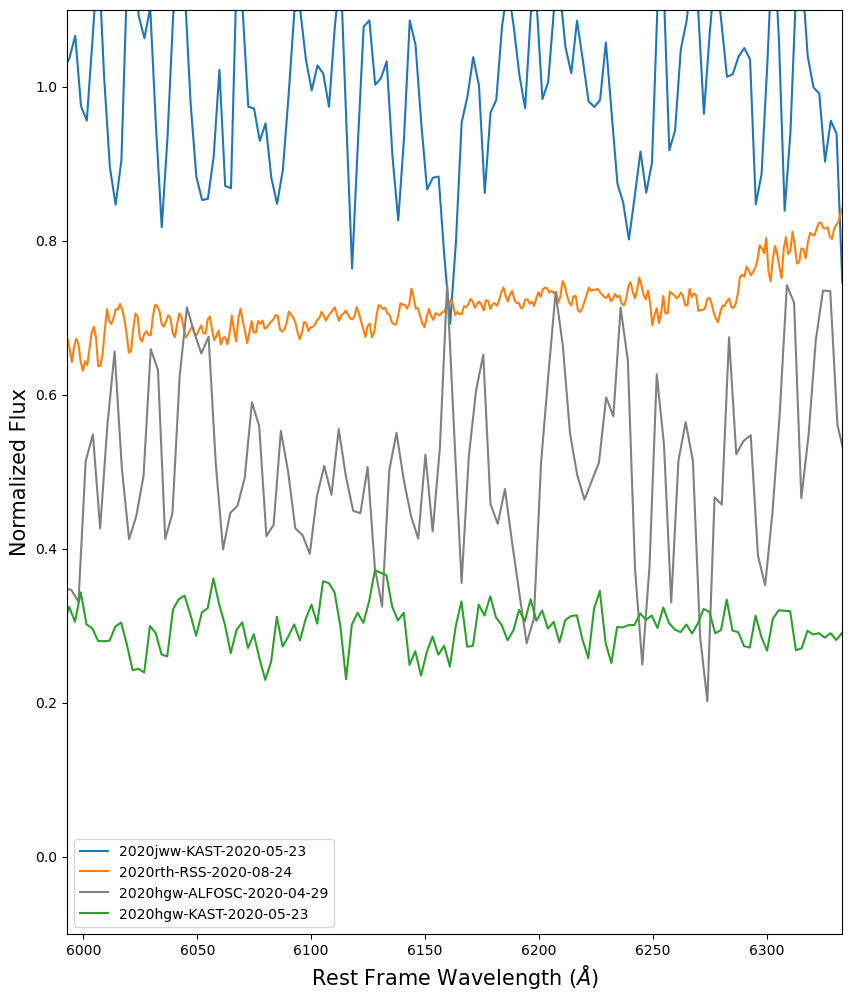

In [42]:
#make all Na I D lines one plot 
plt.figure(figsize=(10, 12)) 
plt.plot(jww_KAST_wavelength, jww_flux_norm, label = '2020jww-KAST-2020-05-23')
plt.plot(rth_wavelength, rth_flux_norm -0.3, label = '2020rth-RSS-2020-08-24')
plt.plot(hgw_ALFOSC_wavelength, hgw_ALFOSC_flux_norm - 0.5, label = '2020hgw-ALFOSC-2020-04-29', color = 'gray')
plt.plot(hgw_KAST_wavelength, hgw_KAST_flux_norm - 0.7, label = '2020hgw-KAST-2020-05-23')
plt.xlim((lower_mask_jww - 150), (upper_mask_jww + 150))

plt.ylim(-0.1, 1.1)
plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)
plt.ylabel('Normalized Flux', fontsize = 15)
plt.legend()

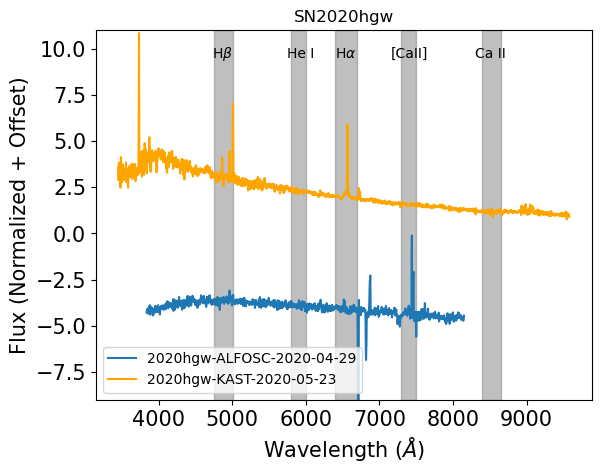

In [43]:
plt.figure()
plt.plot(hgw_ALFOSC_wavelength / (1 + redshifts[0]), hgw_ALFOSC_flux / np.median(hgw_ALFOSC_flux) - 5, label = '2020hgw-ALFOSC-2020-04-29')
plt.plot(hgw_KAST_wavelength / (1 + redshifts[0]), hgw_KAST_flux / np.median(hgw_KAST_flux) * 2, label = '2020hgw-KAST-2020-05-23', color = 'orange')
plt.ylim(-9, 11)
plt.xlabel('Rest Frame Wavelength (Å)', fontsize = 15)
plt.ylabel('Flux (normalized)', fontsize = 15)
plt.title('SN2020hgw')
plt.axvspan(4750, 5010, color='grey', alpha = 0.5)
plt.text(4720, 9.5, r'H$\beta$', fontsize = 10)
plt.axvspan(5800, 6000, color = 'grey', alpha= 0.5)
plt.text(5750, 9.5, r'He I', fontsize = 10)
plt.xlabel('Wavelength $(\AA)$', fontsize = 15)
plt.axvspan(6400, 6700, color = 'grey', alpha = 0.5)
plt.text(6400, 9.5, r'H$\alpha$', fontsize = 10)
plt.axvspan(7300, 7500, color = 'grey', alpha =0.5)
plt.text(7150, 9.5, '[CaII]', fontsize = 10)
plt.axvspan(8400, 8650, color = 'grey', alpha=0.5)
plt.text(8300, 9.5, 'Ca II', fontsize = 10)
plt.ylabel('Flux (Normalized + Offset)', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc='lower left')

Text(0.5, 1.0, 'SN 2020jfo spectral sequence')

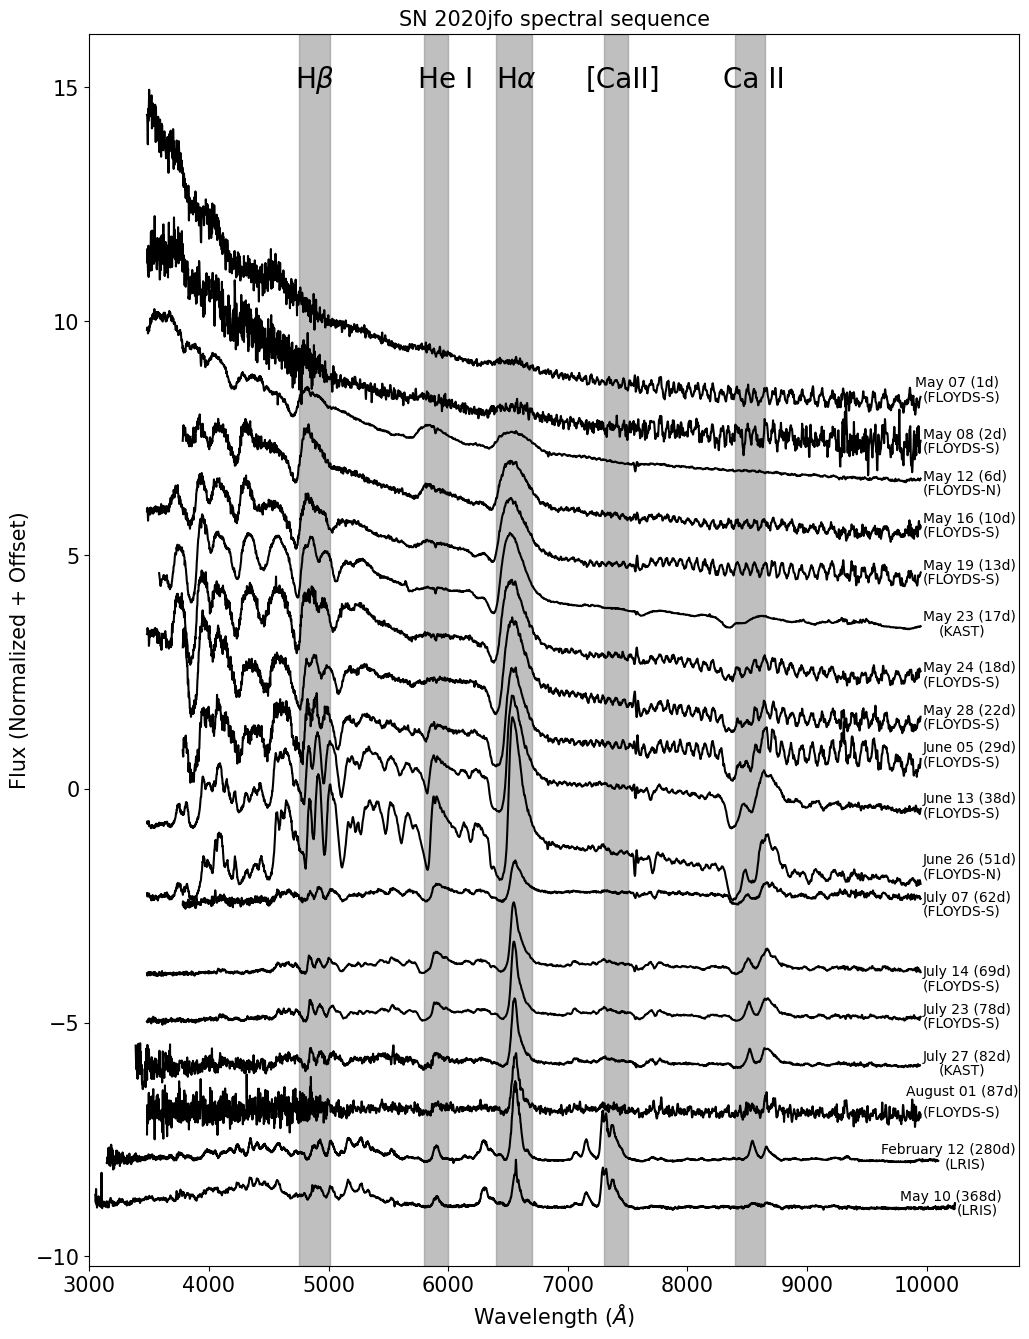

In [44]:
# jfo spectra 

jfo_0507_wl = jfo_0507['col1']
jfo_0507_fx = jfo_0507['col2']

jfo_0508_wl = jfo_0508['col1'] 
jfo_0508_fx = jfo_0508['col2']

jfo_0512_wl = jfo_0512['col1']
jfo_0512_fx = jfo_0512['col2']

jfo_0516_wl = jfo_0516['col1']
jfo_0516_fx = jfo_0516['col2']

jfo_0519_wl = jfo_0519['col1']
jfo_0519_fx = jfo_0519['col2']

jfo_0523_wl = jfo_0523['wavelength']
jfo_0523_fx = jfo_0523['flux']

jfo_0524_wl = jfo_0524['col1']
jfo_0524_fx = jfo_0524['col2']

jfo_0528_wl = jfo_0528['col1']
jfo_0528_fx = jfo_0528['col2']

jfo_0605_wl = jfo_0605['col1']
jfo_0605_fx = jfo_0605['col2']

jfo_0613_wl = jfo_0613['col1']
jfo_0613_fx = jfo_0613['col2']

jfo_0626_wl = jfo_0626['col1']
jfo_0626_fx = jfo_0626['col2']

jfo_0706_wl = jfo_0706['col1']
jfo_0706_fx = jfo_0706['col2']

jfo_0714_wl = jfo_0714['col1']
jfo_0714_fx = jfo_0714['col2']

jfo_0723_wl = jfo_0723['col1']
jfo_0723_fx = jfo_0723['col2']

jfo_0727_wl = jfo_0727['wavelength']
jfo_0727_fx = jfo_0727['flux']

jfo_0801_wl = jfo_0801['col1']
jfo_0801_fx = jfo_0801['col2']

jfo_210212_wl = jfo_210212['wavelength']
jfo_210212_fx = jfo_210212['flux']

jfo_210510_wl = jfo_210510['wavelength']
jfo_210510_fx = jfo_210510['flux']

jfo_z = 1 + redshifts[1] 

plt.figure(figsize=(12, 16))
plt.plot(jfo_0507_wl / jfo_z , jfo_0507_fx / np.median(jfo_0507_fx) + 8, color ='k') #1 days 

plt.plot(jfo_0508_wl / jfo_z, jfo_0508_fx / np.median(jfo_0508_fx) + 7, color ='k') #2d 

plt.plot(jfo_0512_wl / jfo_z, jfo_0512_fx / np.median(jfo_0512_fx) + 6.3, color ='k') #6d 

plt.plot(jfo_0516_wl / jfo_z, jfo_0516_fx / np.median(jfo_0516_fx) + 5, color ='k') #10d 

plt.plot(jfo_0519_wl / jfo_z, jfo_0519_fx / np.median(jfo_0519_fx) + 4, color ='k') #13d 

plt.plot(jfo_0523_wl / jfo_z, jfo_0523_fx / np.median(jfo_0523_fx) + 3, color ='k') #16d 

plt.plot(jfo_0524_wl / jfo_z, jfo_0524_fx / np.median(jfo_0524_fx) + 2, color ='k') #17d 

plt.plot(jfo_0528_wl / jfo_z, jfo_0528_fx / np.median(jfo_0528_fx) + 1, color ='k') #21d 

plt.plot(jfo_0605_wl / jfo_z, jfo_0605_fx / np.median(jfo_0605_fx), color ='k') #29d 

plt.plot(jfo_0613_wl / jfo_z, jfo_0613_fx / np.median(jfo_0613_fx) - 1, color ='k') #37d 

plt.plot(jfo_0626_wl / jfo_z, jfo_0626_fx / np.median(jfo_0626_fx) - 2.5, color ='k') #50d 

plt.plot(jfo_0706_wl / jfo_z, jfo_0706_fx / np.median(jfo_0706_fx)/4 - 2.5, color ='k') 

plt.plot(jfo_0714_wl / jfo_z, jfo_0714_fx / np.median(jfo_0714_fx)/5 - 4, color ='k') 

plt.plot(jfo_0723_wl / jfo_z, jfo_0723_fx / np.median(jfo_0723_fx)/6 - 5, color ='k')

plt.plot(jfo_0727_wl / jfo_z, jfo_0727_fx / np.median(jfo_0727_fx)/7 - 6, color ='k')

plt.plot(jfo_0801_wl / jfo_z, jfo_0801_fx / np.median(jfo_0801_fx)/8 - 7, color ='k')

plt.plot(jfo_210212_wl / jfo_z, jfo_210212_fx / np.median(jfo_210212_fx)/9 - 8, color ='k') 

plt.plot(jfo_210510_wl / jfo_z, jfo_210510_fx / np.median(jfo_210510_fx)/9 - 9, color ='k')

plt.text(9900, 8.6, 'May 07 (1d)')
plt.text(9970, 8.3, '(FLOYDS-S)')
plt.text(9970, 7.5, 'May 08 (2d)')
plt.text(9970, 7.2, '(FLOYDS-S)')
plt.text(9970, 6.6, 'May 12 (6d)')
plt.text(9970, 6.3,'(FLOYDS-N)')
plt.text(9970, 5.7, 'May 16 (10d)')
plt.text(9970, 5.4, '(FLOYDS-S)')
plt.text(9970, 4.7, 'May 19 (13d)')
plt.text(9970, 4.4, '(FLOYDS-S)')
plt.text(9970, 3.6, 'May 23 (17d)')
plt.text(10100, 3.3, '(KAST)')
plt.text(9970, 2.5, 'May 24 (18d)')
plt.text(9970, 2.2, '(FLOYDS-S)')
plt.text(9970, 1.6, 'May 28 (22d)')
plt.text(9970, 1.3, '(FLOYDS-S)')
plt.text(9970, 0.8, 'June 05 (29d)')
plt.text(9970, 0.5, '(FLOYDS-S)')
plt.text(9970, -0.3, 'June 13 (38d)')
plt.text(9970, -0.6, '(FLOYDS-S)')
plt.text(9970, -1.6, 'June 26 (51d)')
plt.text(9970, -1.9, '(FLOYDS-N)')
plt.text(9970, -2.4, 'July 07 (62d)')
plt.text(9970, -2.7, '(FLOYDS-S)')
plt.text(9970, -4.0, 'July 14 (69d)')
plt.text(9970, -4.3, '(FLOYDS-S)')
plt.text(9970, -4.8, 'July 23 (78d)')
plt.text(9970, -5.1, '(FLOYDS-S)')
plt.text(9970, -5.8, 'July 27 (82d)')
plt.text(10100, -6.1, '(KAST)')
plt.text(9830, -6.55, 'August 01 (87d)')
plt.text(9970, -7.0, '(FLOYDS-S)')
plt.text(9620, -7.8, 'February 12 (280d)')
plt.text(10150, -8.1, '(LRIS)')
plt.text(9780, -8.8, 'May 10 (368d)')
plt.text(10250, -9.1, '(LRIS)')
plt.axvspan(4750, 5010, color='grey', alpha = 0.5)
plt.text(4720, 15, r'H$\beta$', fontsize = 20)
plt.axvspan(5800, 6000, color = 'grey', alpha= 0.5)
plt.text(5750, 15, r'He I', fontsize = 20)
plt.xlabel('Wavelength $(\AA)$', fontsize = 15)
plt.axvspan(6400, 6700, color = 'grey', alpha = 0.5)
plt.text(6400, 15, r'H$\alpha$', fontsize = 20)
plt.axvspan(7300, 7500, color = 'grey', alpha =0.5)
plt.text(7150, 15, '[CaII]', fontsize = 20)
plt.axvspan(8400, 8650, color = 'grey', alpha=0.5)
plt.text(8300, 15, 'Ca II', fontsize = 20)
plt.ylabel('Flux (Normalized + Offset)', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(3000, 10775)
plt.title('SN 2020jfo spectral sequence', fontsize = 15)

Text(0.5, 0, 'Rest Frame Wavelength $(\\AA)$')

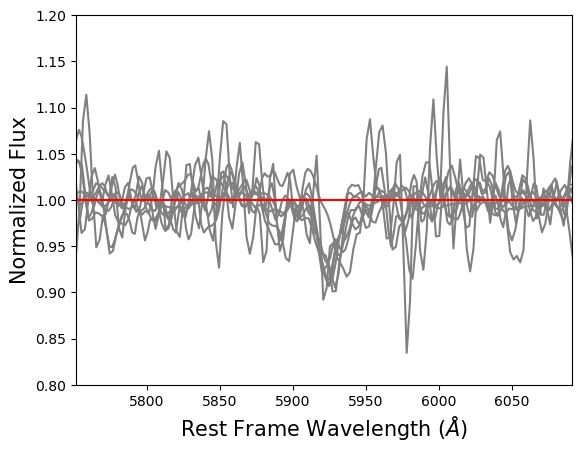

In [54]:
# jfo 
# only wan early time spectra, closest to explosion 
jfo_centroid = na_rest_wavelength * (1 + redshifts[1])

lower_mask = jfo_centroid - 20 
upper_mask = jfo_centroid + 20 

#0507
mask_0507 = (jfo_0507_wl > lower_mask) & (jfo_0507_wl < upper_mask) 
continuum_0507 = ((jfo_0507_wl > (lower_mask - 150)) & (jfo_0507_wl < (lower_mask - 10))|(jfo_0507_wl > (upper_mask + 10)) & (jfo_0507_wl < (upper_mask + 150)))
coeff_jfo_0507 = np.polyfit(jfo_0507_wl[continuum_0507], jfo_0507_fx[continuum_0507], 3)
p_jfo0507 = np.poly1d(coeff_jfo_0507)

jfo_0507_fx_norm = jfo_0507_fx / p_jfo0507(jfo_0507_wl) 


#0508
mask_0508 = (jfo_0508_wl > lower_mask) & (jfo_0508_wl < upper_mask) 
continuum_0508 = ((jfo_0508_wl > (lower_mask - 150)) & (jfo_0508_wl < (lower_mask - 10))|(jfo_0508_wl > (upper_mask + 10)) & (jfo_0508_wl < (upper_mask + 150)))
coeff_jfo_0508 = np.polyfit(jfo_0508_wl[continuum_0508], jfo_0508_fx[continuum_0508], 3)
p_jfo0508 = np.poly1d(coeff_jfo_0508)

jfo_0508_fx_norm = jfo_0508_fx / p_jfo0508(jfo_0508_wl) 


#0512
mask_0512 = (jfo_0512_wl > lower_mask) & (jfo_0512_wl < upper_mask) 
continuum_0512 = ((jfo_0512_wl > (lower_mask - 150)) & (jfo_0512_wl < (lower_mask - 10))|(jfo_0512_wl > (upper_mask + 10)) & (jfo_0512_wl < (upper_mask + 150)))
coeff_jfo_0512 = np.polyfit(jfo_0512_wl[continuum_0512], jfo_0512_fx[continuum_0512], 3)
p_jfo0512 = np.poly1d(coeff_jfo_0512)

jfo_0512_fx_norm = jfo_0512_fx / p_jfo0512(jfo_0512_wl)
 

#0516
mask_0516 = (jfo_0516_wl > lower_mask) & (jfo_0516_wl < upper_mask) 
continuum_0516 = ((jfo_0516_wl > (lower_mask - 150)) & (jfo_0516_wl < (lower_mask - 10))|(jfo_0516_wl > (upper_mask + 10)) & (jfo_0516_wl < (upper_mask + 150)))
coeff_jfo_0516 = np.polyfit(jfo_0516_wl[continuum_0516], jfo_0516_fx[continuum_0516], 3)
p_jfo0516 = np.poly1d(coeff_jfo_0516)

jfo_0516_fx_norm = jfo_0516_fx / p_jfo0516(jfo_0516_wl)
 

#0519
mask_0519 = (jfo_0519_wl > lower_mask) & (jfo_0519_wl < upper_mask) 
continuum_0519 = ((jfo_0519_wl > (lower_mask - 150)) & (jfo_0519_wl < (lower_mask - 10))|(jfo_0519_wl > (upper_mask + 10)) & (jfo_0519_wl < (upper_mask + 150)))
coeff_jfo_0519 = np.polyfit(jfo_0519_wl[continuum_0519], jfo_0519_fx[continuum_0519], 3)
p_jfo0519 = np.poly1d(coeff_jfo_0519)

jfo_0519_fx_norm = jfo_0519_fx / p_jfo0519(jfo_0519_wl)
 
#0523
mask_0523 = (jfo_0523_wl > lower_mask) & (jfo_0523_wl < upper_mask) 
continuum_0523 = ((jfo_0523_wl > (lower_mask - 150)) & (jfo_0523_wl < (lower_mask - 10))|(jfo_0523_wl > (upper_mask + 10)) & (jfo_0523_wl < (upper_mask + 150)))
coeff_jfo_0523 = np.polyfit(jfo_0523_wl[continuum_0523], jfo_0523_fx[continuum_0523], 3)
p_jfo0523 = np.poly1d(coeff_jfo_0523)

jfo_0523_fx_norm = jfo_0523_fx / p_jfo0523(jfo_0523_wl)
 

#0524
mask_0524 = (jfo_0524_wl > lower_mask) & (jfo_0524_wl < upper_mask) 
continuum_0524 = ((jfo_0524_wl > (lower_mask - 150)) & (jfo_0524_wl < (lower_mask - 10))|(jfo_0524_wl > (upper_mask + 10)) & (jfo_0524_wl < (upper_mask + 150)))
coeff_jfo_0524 = np.polyfit(jfo_0524_wl[continuum_0524], jfo_0524_fx[continuum_0524], 3)
p_jfo0524 = np.poly1d(coeff_jfo_0524)

jfo_0524_fx_norm = jfo_0524_fx / p_jfo0524(jfo_0524_wl)
 

#0528
mask_0528 = (jfo_0528_wl > lower_mask) & (jfo_0528_wl < upper_mask) 
continuum_0528 = ((jfo_0528_wl > (lower_mask - 150)) & (jfo_0528_wl < (lower_mask - 10))|(jfo_0528_wl > (upper_mask + 10)) & (jfo_0528_wl < (upper_mask + 150)))
coeff_jfo_0528 = np.polyfit(jfo_0528_wl[continuum_0528], jfo_0528_fx[continuum_0528], 3)
p_jfo0528 = np.poly1d(coeff_jfo_0528)

jfo_0528_fx_norm = jfo_0528_fx / p_jfo0528(jfo_0528_wl)
 
plt.plot(jfo_0507_wl, jfo_0507_fx_norm, color = 'gray')
plt.plot(jfo_0508_wl, jfo_0508_fx_norm, color = 'gray')
plt.plot(jfo_0512_wl, jfo_0512_fx_norm, color = 'gray')
plt.plot(jfo_0516_wl, jfo_0516_fx_norm, color = 'gray')
plt.plot(jfo_0519_wl, jfo_0519_fx_norm, color = 'gray')
plt.plot(jfo_0523_wl, jfo_0523_fx_norm, color = 'gray')
plt.plot(jfo_0524_wl, jfo_0524_fx_norm, color = 'gray')
plt.plot(jfo_0528_wl, jfo_0528_fx_norm, color = 'gray') 



def gauss(x, *params):
    peak, wl, fwhm = params
    y = peak * np.exp(-(x - wl)**2 / fwhm**2)
    return y 
p0 = 0.2, 5920, 6
coeff_jfo_avg = np.polyfit(jfo_0507_wl[mask_0507], jfo_0507_fx[mask_0507], 2)
popt, pcov = curve_fit(gauss, jfo_0507_wl[mask_0507], 1-jfo_0507_fx[mask_0507], p0=p0)
plt.plot(jfo_0507_wl, gauss(jfo_0507_fx, *popt), color = 'r')
plt.xlim(lower_mask - 150, upper_mask + 150)
plt.ylim(0.8, 1.2)
plt.ylabel('Normalized Flux', fontsize = 15)
plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)


In [ ]:
def gauss(x, *params):
    peak, wl, fwhm = params
    y = peak * np.exp(-(x - wl)**2 / fwhm**2)
    return y 
p0 = 0.2, 5920, 6


In [ ]:
# print(hgw_centroid)
# print(jfo_centroid)
# print(jww_centroid)
# print(rth_centroid)
# print(tly_centroid)